<a href="https://colab.research.google.com/github/ddoddii/Kyeonggido-Free-Food-project/blob/main/%EA%B2%BD%EA%B8%B0%EB%8F%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


matplotlib 한글깨짐 문제 해결

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

Text(0.5, 1.0, '테스트')

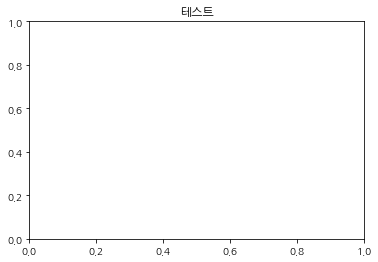

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()
plt.title('테스트')

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point


## 1-1. Data 불러오기

- kyungki: 경기도 데이터
- pt : 경기도 내 무료 급식소 좌표(WGS84)

In [ ]:
kyungki = gpd.GeoDataFrame.from_file('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/공간데이터/경기도분석/LARD_ADM_SECT_SGG_41.shp',encoding='cp949')

In [ ]:
pt = pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/공간데이터/경기도분석/무료급식소좌표_경기도.csv')

In [ ]:
kyungki.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,41630,양주시,369,41630,204,"POLYGON ((953911.873 1993349.285, 954057.312 1..."
1,41830,양평군,353,41830,205,"POLYGON ((1014006.015 1935309.878, 1013975.496..."
2,41820,가평군,339,41820,206,"POLYGON ((1009073.624 1986048.839, 1008980.383..."
3,41800,연천군,353,41800,207,"MULTIPOLYGON (((962928.454 2030283.596, 962943..."
4,41670,여주시,0,41670,208,"POLYGON ((990990.083 1935193.011, 991039.244 1..."


In [ ]:
kyungki.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_SECT_C  42 non-null     object  
 1   SGG_NM      42 non-null     object  
 2   SGG_OID     42 non-null     int64   
 3   COL_ADM_SE  42 non-null     object  
 4   GID         42 non-null     int64   
 5   geometry    42 non-null     geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
kyungki.columns

Index(['ADM_SECT_C', 'SGG_NM', 'SGG_OID', 'COL_ADM_SE', 'GID', 'geometry'], dtype='object')

In [ ]:
list(kyungki['SGG_NM'])

['양주시',
 '양평군',
 '가평군',
 '연천군',
 '여주시',
 '포천시',
 '광주시',
 '화성시',
 '김포시',
 '안성시',
 '이천시',
 '파주시',
 '수지구',
 '기흥구',
 '처인구',
 '하남시',
 '의왕시',
 '군포시',
 '시흥시',
 '오산시',
 '남양주시',
 '구리시',
 '과천시',
 '덕양구',
 '일산동구',
 '일산서구',
 '안산시단원구',
 '안산시상록구',
 '동두천시',
 '평택시',
 '광명시',
 '부천시',
 '안양시동안구',
 '안양시만안구',
 '의정부시',
 '성남시분당구',
 '성남시중원구',
 '성남시수정구',
 '수원시팔달구',
 '수원시장안구',
 '수원시영통구',
 '수원시권선구']

In [ ]:
pt.head()

,시설명,WGS84위도,WGS84경도
0,가평군노인복지관,37.833628,127.511174
1,일산노인종합복지관,37.664447,126.760442
2,일산종합사회복지관,37.684511,126.768513
3,대화노인종합복지관,37.674476,126.748160
4,문촌9종합사회복지관,37.672216,126.760178


In [ ]:
pt['경도'] = pt['WGS84경도'].astype(float)
pt['위도'] = pt['WGS84위도'].astype(float)
pt['geometry'] = pt.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
pt = gpd.GeoDataFrame(pt, geometry='geometry')

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
pt.head()

,시설명,WGS84위도,WGS84경도,경도,위도,geometry
0,가평군노인복지관,37.833628,127.511174,127.511174,37.833628,POINT (127.51117 37.83363)
1,일산노인종합복지관,37.664447,126.760442,126.760442,37.664447,POINT (126.76044 37.66445)
2,일산종합사회복지관,37.684511,126.768513,126.768513,37.684511,POINT (126.76851 37.68451)
3,대화노인종합복지관,37.674476,126.748160,126.748160,37.674476,POINT (126.74816 37.67448)
4,문촌9종합사회복지관,37.672216,126.760178,126.760178,37.672216,POINT (126.76018 37.67222)


## 1-2. 좌표정의 및 변환

공간데이터를 다룰때는 좌표계를 이해하는것이 상당히 중요하다. 서로다른 데이터의 좌표계를 통일 시키거나 변환할때는, 먼저 해당 데이터가 정의된 좌표계가 어떤 것인지 알아야 한다.

대표적으로 위경도, 미터좌표계가 있는데 국내에서는 주로 아래 좌표계를 사용한다.

EPSG4326(WGS84) : 위경도, 기본좌표계

EPSG5179(TM) : 미터 좌표계

EPSG5174(TM) : 미터 좌표계

EPSG5181(TM) : 미터 좌표계

데이터를 받아올때 꼭 어떤 좌표계로 만들어진 데이터 인지를 확인해야 그 데이터를 활용할 수 있다(좌표계를 모르면 못쓰는 데이터라고 해도 무방하다).

기본적으로 python이나 qgis에 내장된 각 좌표계를 사용해도 큰 문제는 없지만 보정좌표 등을 정확하게 정의해 주기 위해서는 직접 해당 좌표계를 정의해주는게 좋다

In [ ]:
print(kyungki.crs)
print(pt.crs)

epsg:5179
None


In [ ]:
pt.crs = {'init':'epsg:4326'}
print(pt.crs)

+init=epsg:4326 +type=crs


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
pt = pt.to_crs({'init':'epsg:5179'})


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


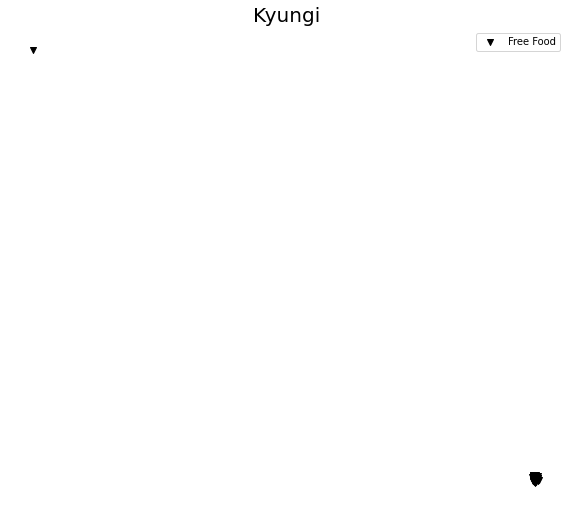

In [ ]:
ax = kyungki.plot(column="SGG_NM", figsize=(10,10), alpha=0.8)
pt.plot(ax=ax, marker='v', color='black', label='Free Food')
ax.set_title("Kyungi", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

## 2-1. 객체 속성

### area

In [ ]:
kyungki.geometry.area.head()

0    3.102629e+08
1    8.762259e+08
2    8.404218e+08
3    6.787820e+08
4    6.068299e+08
dtype: float64

### length

In [ ]:
kyungki.geometry.length.head()

0    112122.282879
1    202366.220356
2    188184.411630
3    257714.037809
4    157248.964851
dtype: float64

Boundary

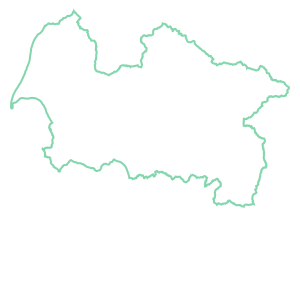

In [ ]:
kyungki.geometry[1].boundary

### centroid

In [ ]:
kyungki.geometry.centroid.head()

0     POINT (956088.031 1978888.479)
1    POINT (1007002.582 1946531.739)
2     POINT (995618.516 1979861.107)
3     POINT (958528.210 2010815.868)
4    POINT (1010258.587 1922617.005)
dtype: geometry

### xy 와 coords

In [ ]:
print(pt['geometry'][0].xy)
print(pt['geometry'][0].coords)
print(list(pt['geometry'][0].coords))

(array('d', [1000983.2243725274]), array('d', [1981540.9902402977]))
[(1000983.2243725274, 1981540.9902402977)]


### is_valid

In [ ]:
kyungki.geometry.is_valid.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

## 2-2. 공간 관계

### within 과 contain

In [ ]:
print(pt.geometry[17].within(kyungki.geometry[0]))

print(kyungki.geometry[0].contains(pt.geometry[17]))

False
False


### intersects & crosses

In [ ]:
print(kyungki.geometry[1].intersects(kyungki.geometry[1]))


print(kyungki.geometry[1].crosses(kyungki.geometry[1]))

True
False


In [ ]:
# 하남시 내 무료급식소
hanam = kyungki.loc[kyungki['SGG_NM']=="하남시",'geometry'].iloc[0]
select_hanam = pt[pt.within(hanam)] 
select_hanam

,시설명,WGS84위도,WGS84경도,경도,위도,geometry
156,사랑의 밥차,37.539041,127.214614,127.214614,37.539041,POINT (974787.787 1948895.895)
157,사랑의 밥차,37.539041,127.214614,127.214614,37.539041,POINT (974787.787 1948895.895)


In [ ]:
# 의정부시 내 무료급식소
uijungbu = kyungki.loc[kyungki['SGG_NM']=="의정부시",'geometry'].iloc[0]
select_uijungbu = pt[pt.within(uijungbu)] 
select_uijungbu

,시설명,WGS84위도,WGS84경도,경도,위도,geometry


In [ ]:
# 군포시
kunpo = kyungki.loc[kyungki['SGG_NM']=="군포시",'geometry'].iloc[0]
select_kunpo = pt[pt.within(kunpo)] 
select_kunpo

,시설명,WGS84위도,WGS84경도,경도,위도,geometry
26,군포시 노인복지관,37.345520,126.947540,126.947540,37.345520,POINT (951067.431 1927531.182)
27,군포시 늘푸른노인복지관,37.363977,126.933104,126.933104,37.363977,POINT (949801.023 1929586.411)
28,군포시 주몽종합사회복지관,37.362878,126.927389,126.927389,37.362878,POINT (949294.222 1929467.578)
29,군포시 가야종합 사회복지관,37.345593,126.923099,126.923099,37.345593,POINT (948902.616 1927552.324)
30,군포시 매화종합사회복지관,37.373868,126.935186,126.935186,37.373868,POINT (949992.014 1930682.649)


용인시 데이터가 경기도 데이터에 없음... 

### distance

In [ ]:
#하남시 내 무료급식소 간 거리
dist = select_hanam['geometry'].loc[156].distance(select_hanam['geometry'].loc[157])
print("약 %s m" % round(dist))

약 0 m


In [ ]:
#군포시 내 무료급식소 간 거리
dist = select_kunpo['geometry'].loc[26].distance(select_kunpo['geometry'].loc[30])
print("약 %s m" % round(dist))

약 3330 m


## 2-3. 공간 연산 및 변형

- buffer : 주어진 거리 내의 모든 점을 이어 Polygon을 만들고(Point,Linestring 적용 시)거나 주어진 거리만큼 확장한다(Polygon 적용 시).
- envelope : Polygon을 감싸는 가장 작은 사각형 Polygon 객체를 만든다.
- convexhull : Polygon에 대하여 convex-hull(볼록껍질)을 만든다.
- unary_union : 여러 공간 데이터의 합집합을 구한다.
- dissolve : 합집합을 구한다(groupby 기능이 포함).
- overlay : 합집합,차집합,교집합 등 공간 연산 기능을 제공한다.

buffer는 객체 타입에 상관없이 해당 객체를 감싸는 원형의 반경을 생성해내고, envelope은 Polygon 타입에 대하여 사각형 형태의 반경을 만들어 낸다.

### Buffer & Envelope

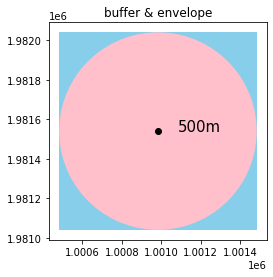

In [ ]:
gapyeong= pt.geometry.iloc[0]
ax = gpd.GeoSeries(gapyeong.buffer(500).envelope).plot(color='skyblue') # envelope
gpd.GeoSeries(gapyeong.buffer(500)).plot(color='pink', ax=ax) # buffer
gpd.GeoSeries(gapyeong).plot(figsize=(5,5), color='black', ax=ax)
plt.title("buffer & envelope")
plt.text(gapyeong.x+100, gapyeong.y, "500m", fontsize=15)
plt.show()

따라서 위와 같은 관계이며, Point에 대하여 500m에 해당하는 사각형 반경을 만들었다고 볼 수도 있다.

초기점에 대하여 grid를 만드는데 유용하게 사용된다.

### convexhull

convexhull이란 2차원 평면상에 여러개의 점이 있을 때 일부를 이용하여 내부에 모든 점을 포함시키는 다각형을 만드는 것을 의미한다.

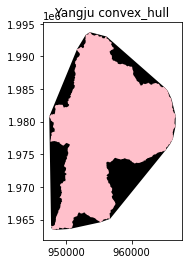

In [ ]:
yangju = kyungki.iloc[[0]]
ax = yangju.convex_hull.plot(color='black')
yangju.plot(figsize=(5,5), ax=ax, color='pink')
plt.title("Yangju convex_hull")
plt.show()

### unary_union 과 dissolve

이제 unary_union와 dissolve를 알아보기 위해 경기도 생활권 계획에 따른 5개 생활권을 그룹핑해보자.

전체 경기도 시

- ['양주시', '양평군', '가평군', '연천군', '여주시', '포천시', '광주시', '화성시', '김포시', '안성시', '이천시', '파주시', '수지구', '기흥구', '처인구', '하남시', '의왕시', '군포시', '시흥시', '오산시', '남양주시', '구리시', '과천시', '덕양구', '일산동구', '일산서구', '안산시단원구', '안산시상록구', '동두천시', '평택시', '광명시', '부천시', '안양시동안구', '안양시만안구', '의정부시', '성남시분당구', '성남시중원구', '성남시수정구','수원시팔달구','수원시장안구','수원시영통구','수원시권선구']

경기도 생활권으로 나누기

- 북부: ‘연천군’, ‘포천시’, ‘파주시’, ‘동두천시’, ‘양주시’, ‘의정부시’,’덕양구’,'일산동구','일산서구'  (덕양구,일산=고양시)

- 동부: ‘양평군’, ‘가평군’, ‘남양주시’, ‘하남시’, ‘여주시’, ‘이천시’, ‘구리시’
- 남동부: ‘성남시분당구’,’성남시중원구',’성남시수정구’, '광주시', ‘안성시’ ,’수지구’,’기흥구’,’처인구’(수지구,기흥구,처인구=용인시)

- 남서부:안양시동안구','안양시만안구', ‘의왕시’, ‘군포시’, ‘오산시’, ‘과천시’,'안산시단원구','안산시상록구',’평택시’,’화성시','수원시팔달구','수원시장안구','수원시영통구', '수원시권선구'

- 서부: ‘시흥시’,’광명시’,’부천시',’김포시’

In [ ]:
dict_ = {}
dict_['북부'] = ["연천군","포천시", "동두천시", "양주시", "의정부시",]
dict_['동부'] = ['양평군', "가평군", "남양주시", "하남시", "여주시", "이천시", "구리시"]
dict_['남동부'] = ['성남시분당구','성남시중원구','성남시수정구', '광주시', "안성시" ,"수지구","기흥구","처인구"]
dict_['남서부'] = ['안양시동안구','안양시만안구', "의왕시", "군포시", "오산시", "과천시",'안산시단원구','안산시상록구',"평택시","화성시","수원시팔달구","수원시장안구","수원시영통구", "수원시권선구"]
dict_['서부'] = ["시흥시","광명시","부천시","김포시","파주시","덕양구","일산동구","일산서구"]
for k,v in dict_.items():
    kyungki.loc[kyungki['SGG_NM'].isin(v), 'group'] = k

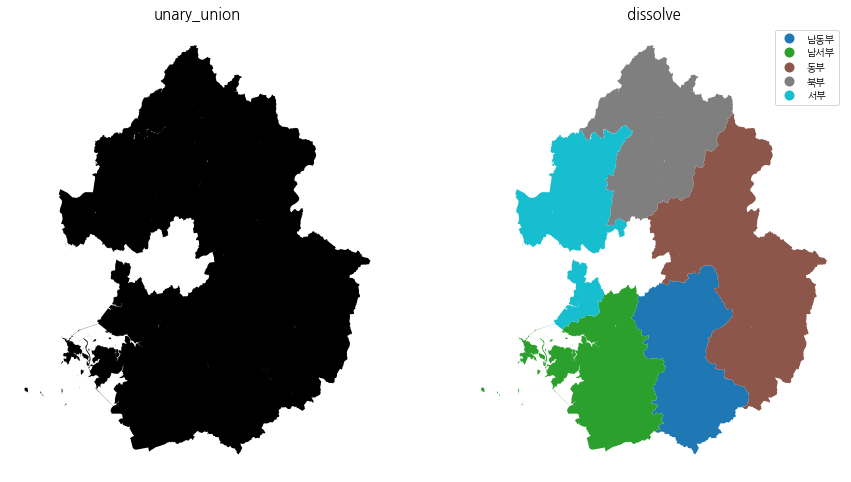

In [ ]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1, 2, 1)
gpd.GeoSeries(kyungki.unary_union).plot(color='black', ax=ax)
ax.set_title("unary_union", fontsize=15)
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
kyungki.dissolve(by='group').reset_index().plot(column = 'group', ax=ax, legend=True)
ax.set_title("dissolve", fontsize=15)
ax.set_axis_off()

### overlay

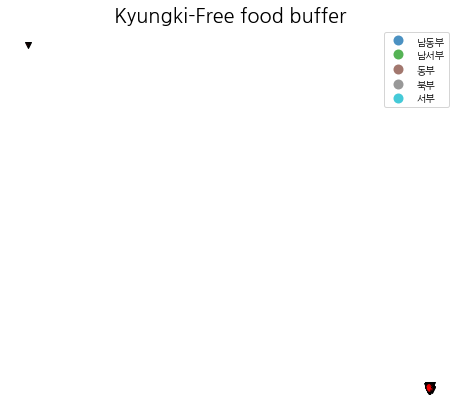

group
남동부    1.715502e+09
남서부    1.674290e+09
동부     3.370651e+09
북부     1.992021e+09
서부     1.459692e+09
dtype: float64


In [ ]:
buf_poly = gpd.GeoDataFrame({'geometry': pt.buffer(1000)}) #무료급식소 반경 1km
origin_ = kyungki.groupby(['group']).apply(lambda gr : gr.area.sum())

ax = kyungki.plot(column="group", figsize=(8,8), alpha=0.8, legend=True)
pt.plot(ax=ax, marker='v', color='black', label='Free Food')
buf_poly.boundary.plot(ax=ax, color='red')
ax.set_title("Kyungki-Free food buffer", fontsize=20)
ax.set_axis_off()
plt.show()

print(origin_)

In [ ]:
!pip install geopandas

In [ ]:
!pip install pygeos    

In [ ]:
!pip install rtree

     |████████████████████████████████| 1.0 MB 5.4 MB/s 


In [ ]:
import pygeos
gpd.options.use_pygeos = True

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
!pip uninstall rtree
!sudo apt install libspatialindex-dev
!pip install rtree

Found existing installation: Rtree 1.0.0
Uninstalling Rtree-1.0.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Rtree-1.0.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Rtree.libs/libspatialindex-91fc2909.so.6.1.1
    /usr/local/lib/python3.7/dist-packages/rtree/*
Proceed (y/n)? y
  Successfully uninstalled Rtree-1.0.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 47 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/univ

In [ ]:
dif_area = gpd.overlay(kyungki, buf_poly, how='difference')
dif_area = dif_area.dissolve(by='group')
ax = dif_area.plot(column="SGG_NM", figsize=(8,8), alpha=0.8)
ax.set_title("Kyungki-Free food buffer", fontsize=20)
ax.set_axis_off()
plt.show()

print("전체 대비 미커버지역 비율")
print(round(dif_area.area / origin_ * 100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:5179
Right CRS: +init=epsg:5179 +type=crs

  """Entry point for launching an IPython kernel.


NameError: ignored